# Cartesian mesh

For this assignment, you are required to generate a Cartesian mesh and map particle positions onto the grid using two techniques: Nearest-Neighbour (NN) and Cloud-in-Cell (CIC). Then reconstruct the density field for both methods and compare the resulting densities between NN and CIC. Finally, compute the radial density profile directly from the particle positions and compare it with the densities obtained from both methods, discussing any observed differences.

The columns are x, y, z.

cloud_full.ascii is the same but also contains the density (for them to check) and an internal energy (x, y, z, rho, u).

The mass of the particles should be chosen such that the full system amounts to M = 1.

In [1]:
function load_stars() :: Array{Float64}
    stars = Array{Float64,2}
    display(stars)
    open("cloud_positions.ascii") do file
        nstars = countlines(file)
        stars = zeros(nstars, 3)
        for (index, line) in enumerate(eachline(file))
            single = [parse(Float64, i) for i in split(line, " ")]
            println(single)
            stars[index, :] = single
        end
    end
    return stars
end

load_stars (generic function with 1 method)

In [2]:
using Plots
function plot_cloud(stars::Array{Float64,2})
    plot(
        stars[1, :, :],
        stars[2, :, :],
        stars[3, :, :],
        seriestype = :scatter,
        markersize = 1,
        legend = false,
        xlabel = "x",
        ylabel = "y",
        zlabel = "z",
    )
end

plot_cloud (generic function with 1 method)

Matrix{Float64} (alias for Array{Float64, 2})

65494×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 ⋮         
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

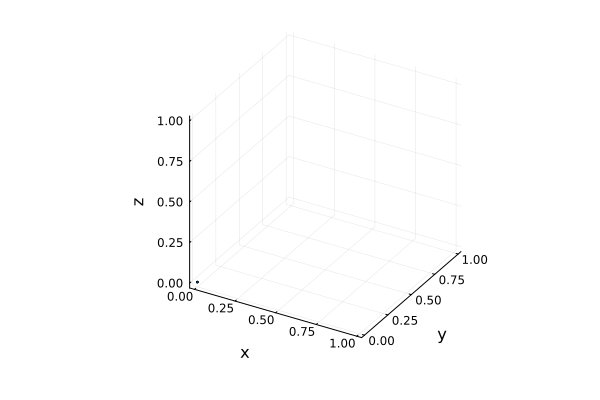

In [4]:
stars = load_stars()
display(stars)
plot_cloud(stars)